**Import and setup**


In [2]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/CA683 Assignment")

Mounted at /content/drive


**Import dataset**

Import the dataset and print the top 3 rows to check it imported correctly and to see what the data looks like

In [32]:
df = pd.read_csv('cincinnati_traffic_crash_data__cpd.csv')
df.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CPD_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,CRASHSEVERITY,...,LOCALREPORTNO,MANNEROFCRASH,ROADCONDITIONSPRIMARY,ROADCONTOUR,ROADSURFACE,SNA_NEIGHBORHOOD,TYPEOFPERSON,WEATHER,ZIP,UNITTYPE
0,19,63XX GRACELY,39.107808,-84.688195,31-40,SAYLER PARK,SAYLER PARK,06/17/2014 05:25:00 PM,03 - T-INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),...,145004877,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",SAYLER PARK,D - DRIVER,1 - CLEAR,45233.0,03 - MID SIZE
1,20,9XX CHATEAU AV,39.108110,-84.560280,18-25,EAST PRICE HILL,EAST PRICE HILL,02/15/2015 03:00:00 PM,01 - NOT AN INTERSECTION,2 - INJURY,...,155002081,1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES I...,01 - DRY,2 - STRAIGHT GRADE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",EAST PRICE HILL,O - OCCUPANT,1 - CLEAR,45204.0,02 - COMPACT
2,21,30XX READING RD,39.135486,-84.496520,18-25,AVONDALE,AVONDALE,07/23/2015 11:54:00 PM,01 - NOT AN INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),...,155010090,"7 - SIDESWIPE, SAME DIRECTION",01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",AVONDALE,O - OCCUPANT,1 - CLEAR,45206.0,04 - FULL SIZE


**Check the integrity of the data**

We discover the crash location and gender have less values than other columns

In [33]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258672 entries, 0 to 258671
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      258672 non-null  int64  
 1   ADDRESS_X                       258669 non-null  object 
 2   LATITUDE_X                      258672 non-null  float64
 3   LONGITUDE_X                     258672 non-null  float64
 4   AGE                             258672 non-null  object 
 5   COMMUNITY_COUNCIL_NEIGHBORHOOD  253006 non-null  object 
 6   CPD_NEIGHBORHOOD                252959 non-null  object 
 7   CRASHDATE                       258669 non-null  object 
 8   CRASHLOCATION                   194021 non-null  object 
 9   CRASHSEVERITY                   258672 non-null  object 
 10  CRASHSEVERITYID                 258672 non-null  float64
 11  DATECRASHREPORTED               258670 non-null  object 
 12  DAYOFWEEK       

**Remove columns that we do not need**

In [34]:
df = df.drop(labels=['Unnamed: 0', 'ADDRESS_X', 'LATITUDE_X', 'LONGITUDE_X', 'DATECRASHREPORTED', 'INSTANCEID', 'LOCALREPORTNO', 'INSTANCEID', 'CRASHSEVERITY', 'CRASHSEVERITYID', 'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'ZIP', 'CPD_NEIGHBORHOOD', 'MANNEROFCRASH'], axis=1)
df.head(3)

,AGE,CRASHDATE,CRASHLOCATION,DAYOFWEEK,GENDER,INJURIES,LIGHTCONDITIONSPRIMARY,ROADCONDITIONSPRIMARY,ROADCONTOUR,ROADSURFACE,SNA_NEIGHBORHOOD,TYPEOFPERSON,WEATHER,UNITTYPE
0,31-40,06/17/2014 05:25:00 PM,03 - T-INTERSECTION,TUE,F - FEMALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",SAYLER PARK,D - DRIVER,1 - CLEAR,03 - MID SIZE
1,18-25,02/15/2015 03:00:00 PM,01 - NOT AN INTERSECTION,SUN,F - FEMALE,3 - NON-INCAPACITATING,1 - DAYLIGHT,01 - DRY,2 - STRAIGHT GRADE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",EAST PRICE HILL,O - OCCUPANT,1 - CLEAR,02 - COMPACT
2,18-25,07/23/2015 11:54:00 PM,01 - NOT AN INTERSECTION,THU,F - FEMALE,1 - NO INJURY / NONE REPORTED,4 - DARK - LIGHTED ROADWAY,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",AVONDALE,O - OCCUPANT,1 - CLEAR,04 - FULL SIZE


**Tidy up**

In [35]:
df['INJURIES'] = df['INJURIES'].replace(['1 - NO INJURY / NONE REPORTED','5 - NO APPARENTY INJURY'], 0)
df['INJURIES'] = df['INJURIES'].replace(['3 - NON-INCAPACITATING', '4 - POSSIBLE INJURY',
       '3 - SUSPECTED MINOR INJURY', '2 - POSSIBLE', '4 - INCAPACITATING',
       '2 - SUSPECTED SERIOUS INJURY', '5 - FATAL', '1 - FATAL'], 1)

# Chane two cell values with other to UNKNOWN
df['ROADSURFACE'] = df['ROADSURFACE'].replace(['6 - OTHER', '9 - OTHER'],'UNKNOWN')

# Fix the other columns by stripping out the number, dash and space and leave the salient information
cols = ['LIGHTCONDITIONSPRIMARY', 'ROADCONDITIONSPRIMARY', 'WEATHER', 'GENDER', 'TYPEOFPERSON', 'UNITTYPE', 'CRASHLOCATION', 'ROADCONTOUR', 'ROADSURFACE']

for col in cols:
  df[col] = df[col].str.split(" - ", 1).str[1]

# Update null values with unknown
df['ROADSURFACE'].fillna('UNKNOWN', inplace=True)
df['GENDER'].fillna('UNKNOWN', inplace=True)
df['SNA_NEIGHBORHOOD'].fillna('UNKNOWN', inplace=True)
df['CRASHLOCATION'].fillna('UNKNOWN', inplace=True)

# Dropping all rows where INJURIES is nan as INJURIES will be our y value 
df.dropna(subset = ['INJURIES'])

# Dropping all rows in AGE where AGE is unknown
df.drop(df.index[df['AGE'] == 'UNKNOWN'], inplace=True)

def AgeMean(x):
    if x == 'UNDER 18':
        return 9.0
    elif x == '18-25':
        return 21.5
    elif x == '26-30':
        return 28.0
    elif x == '31-40':
        return 35.5
    elif x == '41-50':
        return 45.5
    elif x == '51-60':
        return 55.5
    elif x == '61-70':
        return 65.5
    else:
        return 73.35 # Over 70 and mean of life expectancy in Cincinnati (76.7)

df['AGE FLOAT'] = df['AGE'].apply(lambda x: AgeMean(x))

# Classify time of crash into 6 categories of 4 hours
df['HOUR'] = pd.DatetimeIndex(df['CRASHDATE']).hour

df = df.drop(labels=['CRASHDATE', 'HOUR', 'AGE'], axis=1) # No longer required, we have information we need

# Renaming so all data fits on screen without scroll
df = df.rename(columns={'CRASHLOCATION': 'LOCATION', 'LIGHTCONDITIONSPRIMARY': 'LIGHTCONDITIONS', 'ROADCONDITIONSPRIMARY': 'ROADCONDITIONS', 'AGE FLOAT': 'AGE'}) 

    
  

**View**


In [36]:
df.head(1)

,LOCATION,DAYOFWEEK,GENDER,INJURIES,LIGHTCONDITIONS,ROADCONDITIONS,ROADCONTOUR,ROADSURFACE,SNA_NEIGHBORHOOD,TYPEOFPERSON,WEATHER,UNITTYPE,AGE
0,T-INTERSECTION,TUE,FEMALE,0.0,DAYLIGHT,DRY,STRAIGHT LEVEL,"BLACKTOP, BITUMINOUS, ASPHALT",SAYLER PARK,DRIVER,CLEAR,MID SIZE,35.5


**Convert data to floats for fitting**

In [37]:
# location = list(df.LOCATION.unique())

# for l in location:
#   print(l)
#   print(location.index(l))
#   df['LOCATION FLOAT'] = df['LOCATION'].replace(l, location.index(l))

# df['LOCATION FLOAT'].unique()
	

# locations = df.LOCATION.unique()
# loc_dict = dict(zip(locations, range(len(locations))))


# for key in loc_dict:
#   df['LOCATIONFLOAT'] = df['LOCATION'].replace([key], loc_dict[key])


# df.head(1)




# dayofweek = df.DAYOFWEEK.unique()
# gender = df.GENDER.unique()
# injuries = df.INJURIES.unique()
# lightconditions = df.LIGHTCONDITIONS.unique()
# roadconditions = df.ROADCONDITIONS.unique()
# roadcontour = df.ROADCONTOUR.unique()
# roadsurface = df.ROADSURFACE.unique()
# sna_neighbourhood = df.SNA_NEIGHBORHOOD.unique()
# typeofperson = df.TYPEOFPERSON.unique()
# weather = df.WEATHER.unique()
# unittype = df.UNITTYPE.unique()

# print(unittype)

**Split the data**

In [38]:
from sklearn.model_selection import train_test_split

trainingSet, testSet = train_test_split(df, test_size=0.2)

**Create training and test dataframes**

In [39]:
train_df = trainingSet
test_df = testSet

**Create x and y train and test set and load x and y values into them**

In [40]:
x_train = train_df[['AGE', 'LOCATION', 'DAYOFWEEK', 'GENDER', 'LIGHTCONDITIONS', 'ROADCONDITIONS',	'ROADCONTOUR', 'ROADSURFACE', 'SNA_NEIGHBORHOOD', 'TYPEOFPERSON',	'WEATHER',	'UNITTYPE']]

y_train = train_df['INJURIES']

x_test = test_df[['AGE', 'LOCATION', 'DAYOFWEEK', 'GENDER', 'LIGHTCONDITIONS', 'ROADCONDITIONS',	'ROADCONTOUR', 'ROADSURFACE', 'SNA_NEIGHBORHOOD', 'TYPEOFPERSON',	'WEATHER',	'UNITTYPE']]	

y_test = test_df['INJURIES']

**Explore Data**

In [41]:
y_train.value_counts()

0.0    151342
1.0     30705
Name: INJURIES, dtype: int64

**Plot Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


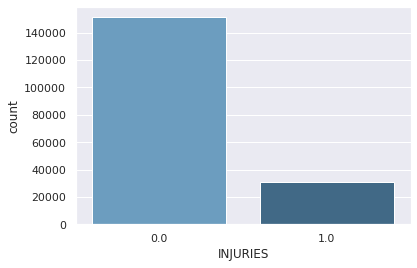

<Figure size 432x288 with 0 Axes>

In [42]:
sns.countplot('INJURIES', data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

**Get percentages**

In [43]:
print('Percentages of values in INJURIES: ')
df['INJURIES'].value_counts(normalize=True) * 100

Percentages of values in INJURIES: 


0.0    83.189415
1.0    16.810585
Name: INJURIES, dtype: float64

**Look at crashes in wet conditions**

In [51]:
dfnew = df.loc[(df['ROADCONDITIONS'] == 'DRY') | (df['ROADCONDITIONS'] == 'WATER (STANDING, MOVING)') | (df['ROADCONDITIONS'] == 'WET')]

dfnew.groupby("ROADCONDITIONS").mean()



,INJURIES,AGE
ROADCONDITIONS,,
DRY,0.165613,37.826857
"WATER (STANDING, MOVING)",0.328571,37.860714
WET,0.177942,36.550621


**Gender**

In [55]:
dfnew = df.loc[(df['GENDER'] == 'MALE') | (df['GENDER'] == 'FEMALE')]

dfnew.groupby("GENDER").mean()

,INJURIES,AGE
GENDER,,
FEMALE,0.197827,36.224668
MALE,0.142902,38.574306


**Model**

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder



# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer

# transformer = make_column_transformer(
#     (OneHotEncoder(), ['AGE', 'LOCATION', 'DAYOFWEEK', 'GENDER', 'LIGHTCONDITIONS', 'ROADCONDITIONS',	'ROADCONTOUR', 'ROADSURFACE', 'SNA_NEIGHBORHOOD', 'TYPEOFPERSON',	'WEATHER',	'UNITTYPE',	'TIMEOFDAY']),
#     remainder='passthrough')

# transformed = transformer.fit_transform(x_train)
# transformed_x_train = pd.DataFrame(transformed)

mappings = []

label_encoder = LabelEncoder()

for i, col in enumerate(x_train):
    if x_train[col].dtype == 'object':
        x_train[col] = label_encoder.fit_transform(np.array(x_train[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))


logreg = LogisticRegression()

logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


ValueError: ignored